# Dataset-1 retail sales data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("retail_sales_dataset.csv")
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [2]:
df.shape

(1000, 9)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [4]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


the data set contains 1000 rows and 9 columns.
it includes numerical and categorical features related to retail sales.

In [5]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

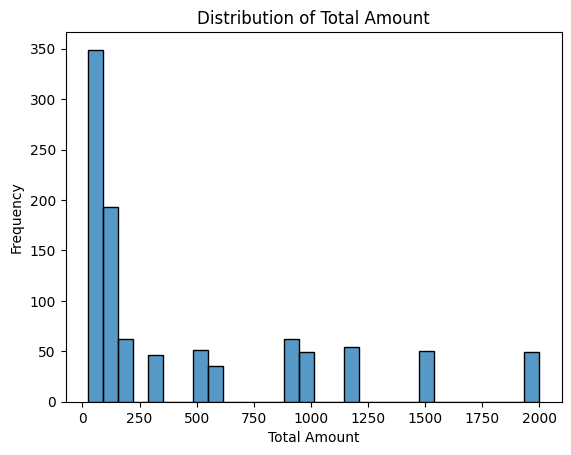

In [7]:
#TOTAL AMOUNT(SALES DISTRIBUTION)
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['Total Amount'], bins=30)
plt.title("Distribution of Total Amount")
plt.xlabel("Total Amount")
plt.ylabel("Frequency")
plt.show()


Most transactions fall within the lower total amount range,indicating frequent low-value purchases.

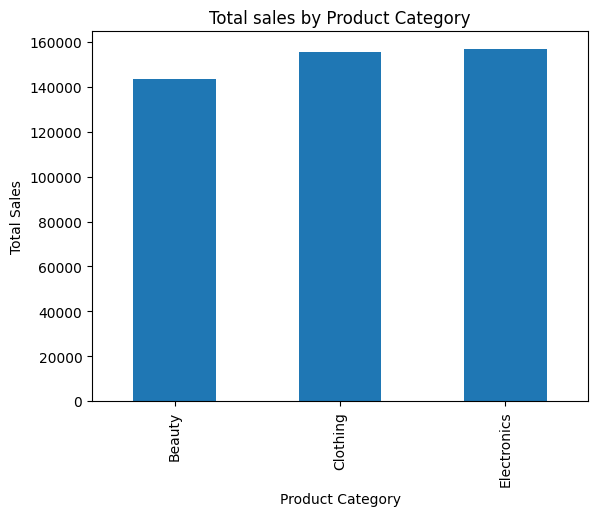

In [8]:
#PRODUCT CATEGORY-WISE TOTAL SALES
df.groupby("Product Category")['Total Amount'].sum().plot(kind='bar')
plt.title("Total sales by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.show()

Certain product categories contribute significantly more to overall sales compared to others.

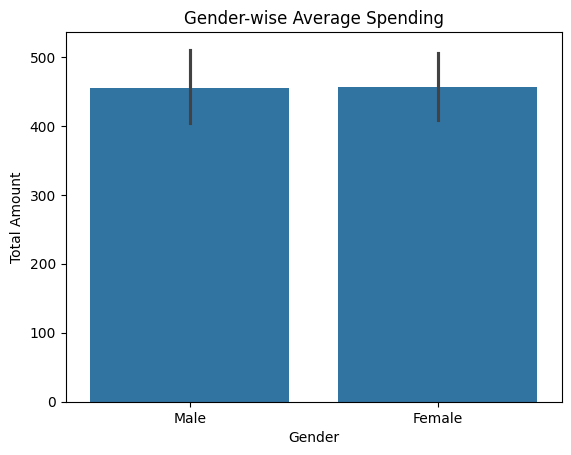

In [9]:
#GENDER-WISE SPENDING ANALYSIS
sns.barplot(x='Gender', y='Total Amount',data=df)
plt.title("Gender-wise Average Spending")
plt.show()

Average spending varies between genders,highlighting different purchasing behaviors.

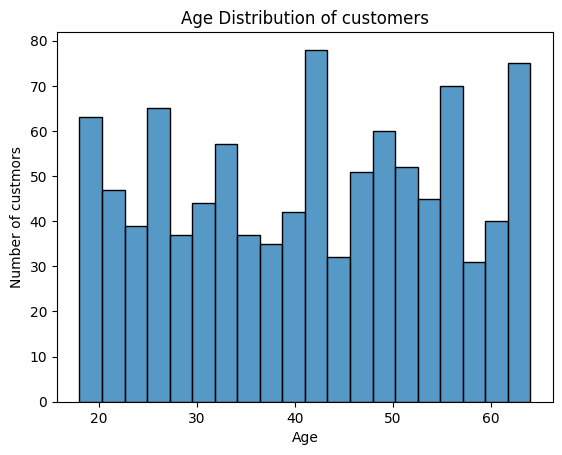

In [10]:
#AGE DISTRIBUTION OF CUSTOMERS
#ensure age is numeric
df['Age']=pd.to_numeric(df['Age'],errors='coerce')
#remove invalid ages
df=df.dropna(subset=['Age'])
import seaborn as sna
import matplotlib.pyplot as plt
sns.histplot(df['Age'], bins=20)
plt.title("Age Distribution of customers")
plt.xlabel("Age")
plt.ylabel("Number of custmors")
plt.show()

Most custmors belong to a specific age group,indicating the primary target audience.

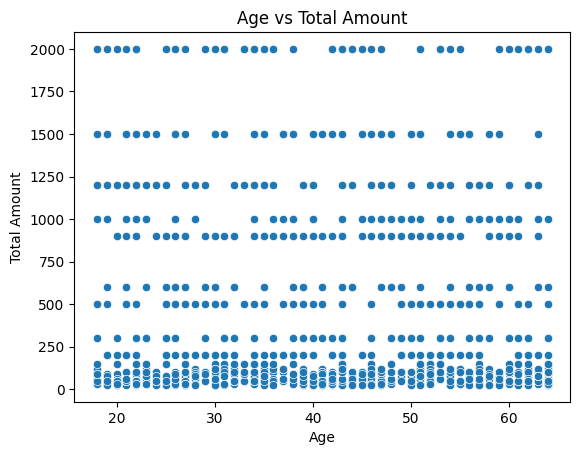

In [11]:
#AGE VS TOTAL AMOUNT
sns.scatterplot(x='Age' , y='Total Amount', data=df)
plt.title("Age vs Total Amount")
plt.show()

There is no strong linear relationship,but higher spending is observed in certain age groups.

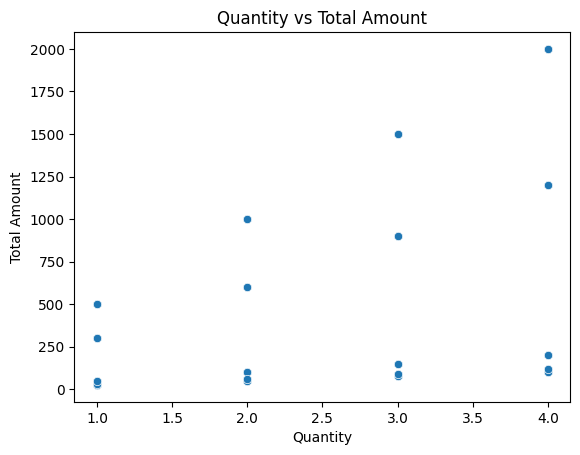

In [12]:
#QUANTITY VS TOTAL AMOUNT
sns.scatterplot(x='Quantity', y='Total Amount', data=df)
plt.title("Quantity vs Total Amount")
plt.show()

Total amount increases as quantity purchased increases.

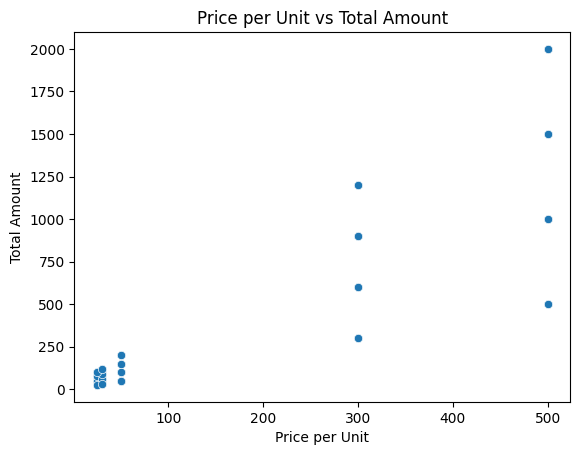

In [13]:
#PRICE PER UNIT VS TOTAL AMOUT
sns.scatterplot(x='Price per Unit',y='Total Amount',data=df)
plt.title("Price per Unit vs Total Amount")
plt.show()

Transactions with higher unit prices often lead to higher total amounts,even with lower quantites.

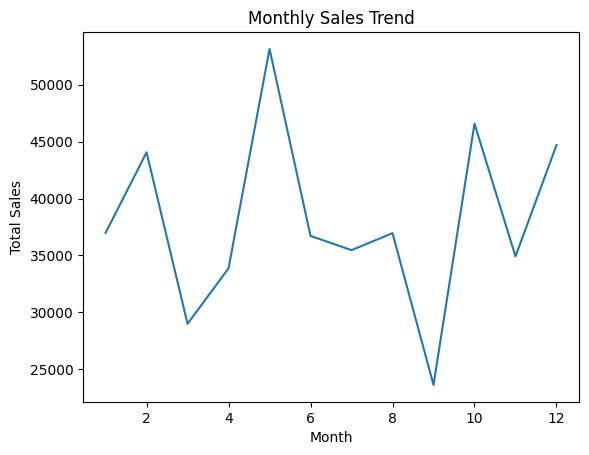

In [14]:
#Data-based Analysis.
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].dt.month
df.groupby('Month')['Total Amount'].sum().plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

Sales vary across months,indicating seasonal buying patterns.

#Final Insights and Conclusion
- The majority of retail transcations are of lower total amounts, indicating frequent low-value purchases.
- Product category plays a significant role in revenue generation, with certain categories contributing more to overall 
sales.
- Gender-wise analysis shows noticeable differences in average spending patterns.
- Most customers fall within a specific age group, making them the primary target audience for retail sales.
- A positive relationship is observed between quantity purchased and total transaction amount.
- Higher price per unit generally results in higher total purchase value, even when quantities are low.
- Monthly sales analysis shows variations across different months, indicating seasonal puurchasing.

Overall, the findings of this analysis can help business make informed decisions to improve sales and customer satisfaction.

# Dataset-2 menu

In [15]:
df2 = pd.read_csv("menu.csv")  
df2.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [16]:
df2.shape

(260, 24)

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

DataSet-2 contains nutrition dataset.

In [18]:
df2.isnull().sum()

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

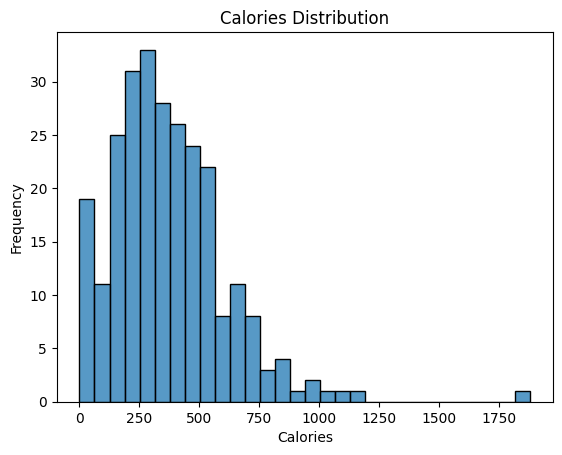

In [19]:
#Calories Distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df2['Calories'], bins=30)
plt.title("Calories Distribution")
plt.xlabel("Calories")
plt.ylabel("Frequency")
plt.show()

Most food items fall within a moderate calorie range, with few high-calorie items.

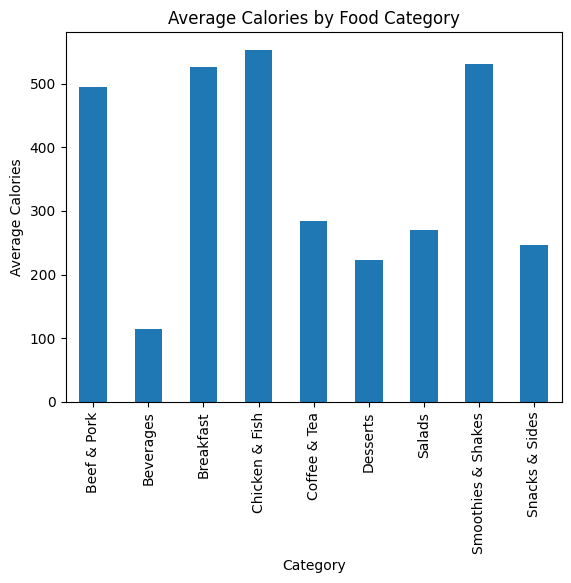

In [20]:
#Category-wise Average Calories
df2.groupby('Category')['Calories'].mean().plot(kind='bar')
plt.title("Average Calories by Food Category")
plt.ylabel("Average Calories")
plt.show()

Certain food categories have significantly higher average calorie content.

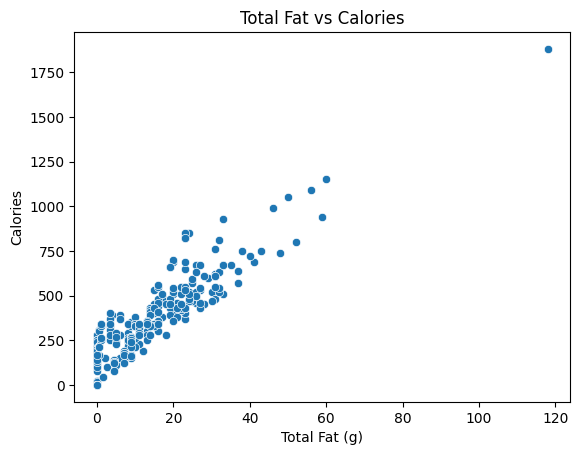

In [21]:
#Total Fat vs Calories
sns.scatterplot(x='Total Fat', y='Calories', data=df2)
plt.title("Total Fat vs Calories")
plt.xlabel("Total Fat (g)")
plt.ylabel("Calories")
plt.show()

Foods with higher fat content generally tend to have higher calorie values.

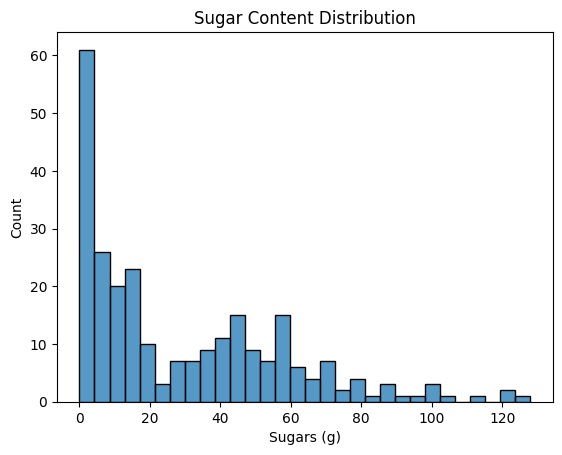

In [22]:
#Sugar Content Distribution
sns.histplot(df2['Sugars'], bins=30)
plt.title("Sugar Content Distribution")
plt.xlabel("Sugars (g)")
plt.show()

Many food items contain low sugar levels, while a few items are high in sugar.

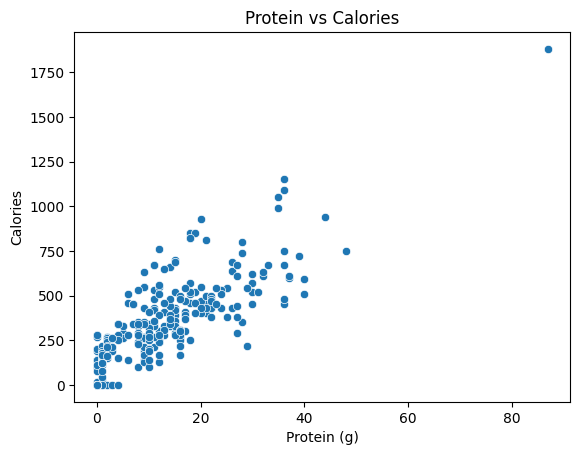

In [23]:
#Protein vs Calories
sns.scatterplot(x='Protein', y='Calories', data=df2)
plt.title("Protein vs Calories")
plt.xlabel("Protein (g)")
plt.ylabel("Calories")
plt.show()

Higher protein foods do not always correspond to higher calorie content.

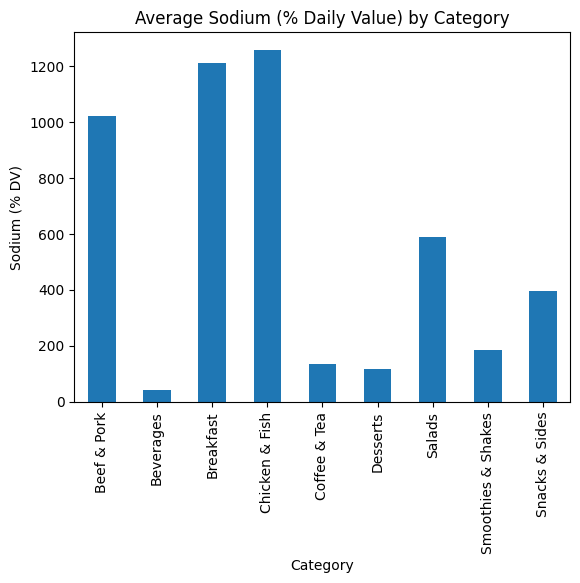

In [24]:
# Sodium (% Daily Value) by Category
df2.groupby('Category')['Sodium'].mean().plot(kind='bar')
plt.title("Average Sodium (% Daily Value) by Category")
plt.ylabel("Sodium (% DV)")
plt.show()

Sodium content varies widely across different food categories.

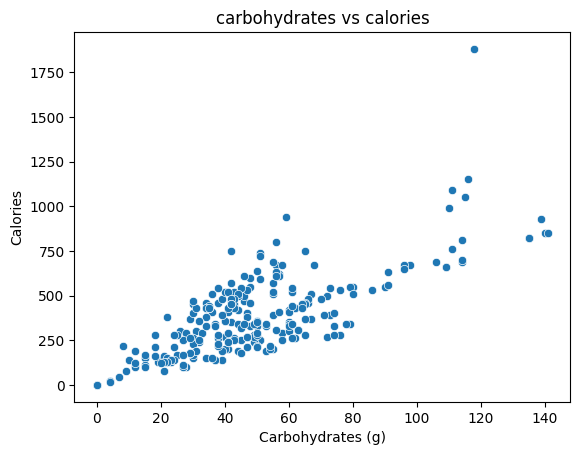

In [25]:
# Calories vs carbohydrates
sns.scatterplot(x='Carbohydrates', y='Calories', data=df2)
plt.title("carbohydrates vs calories")
plt.xlabel("Carbohydrates (g)")
plt.ylabel("Calories")
plt.show()

Higher carbohydrate content contributes to higher calorie values.

# Final Insights and Conclusion
- Most food items contain moderate calorie levels, with only a few being high-calorie.
- Certain food categories contribute more to calorie and fat intake.
- A positive relationship is observed between total fat and calorie content.
- Sugar content varies widely across food items, indicating healthier and less healthy choices.
- Protein-rich foods do not necessarily have higher calorie values.
- Sodium content differs significantly between categories, highlighting potential health concerns.
- Vitamin content varies across food items, affecting overall nutritional value.

Overall, this analysis helps consumers and nutrition planners make informed dietary choices by understanding the nutritional composition of different food categories.
